## Mission 2. Abengers, Assemble!

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.

In [98]:
stats_df = pd.read_csv('./charcters_stats.csv')

In [99]:
stats_df.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [100]:
stats_df.dtypes

Name            object
Alignment       object
Intelligence     int64
Strength         int64
Speed            int64
Durability       int64
Power            int64
Combat           int64
Total            int64
dtype: object

In [101]:
stats_df.describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,44.502455,29.083470,27.306056,41.839607,40.312602,43.206219,226.250409
std,32.924722,32.610939,25.760173,36.543849,34.539910,33.270329,167.324034
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
50%,50.000000,10.000000,23.000000,32.000000,37.000000,50.000000,255.000000
75%,75.000000,53.000000,42.000000,80.000000,67.000000,70.000000,351.500000
max,113.000000,100.000000,100.000000,120.000000,100.000000,101.000000,581.000000


In [102]:
stats_df[stats_df['Total']==max(stats_df['Total'])]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581


- Total의 값이 가장 큰 Martian Manhunter의 능력치가 가장 크다고 볼 수 있다. 

### 2.좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

In [103]:
stats_df[['Intelligence','Strength','Speed','Durability','Power','Combat']].corr()

,Intelligence,Strength,Speed,Durability,Power,Combat
Intelligence,1.000000,0.565508,0.619845,0.683933,0.720550,0.783679
Strength,0.565508,1.000000,0.640657,0.793649,0.639829,0.575045
Speed,0.619845,0.640657,1.000000,0.704255,0.683467,0.594568
Durability,0.683933,0.793649,0.704255,1.000000,0.756840,0.679583
Power,0.720550,0.639829,0.683467,0.756840,1.000000,0.653452
Combat,0.783679,0.575045,0.594568,0.679583,0.653452,1.000000


In [104]:
my_stats_df.isnull().sum()

Name            0
Alignment       0
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
dtype: int64

In [105]:
my_stats_df = stats_df[stats_df['Alignment'].isnull() == False]

In [106]:
my_stats_df.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


### Intelligence

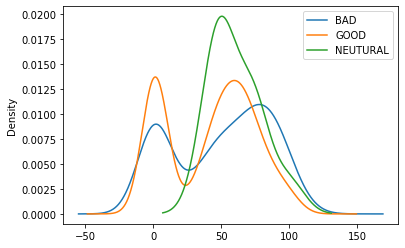

In [107]:
my_stats_df['Intelligence'][my_stats_df['Alignment'] == 'bad'].plot(kind='kde')
my_stats_df['Intelligence'][my_stats_df['Alignment'] == 'good'].plot(kind='kde')
my_stats_df['Intelligence'][my_stats_df['Alignment'] == 'neutral'].plot(kind='kde')
plt.legend(['BAD','GOOD','NEUTURAL'])
plt.show()

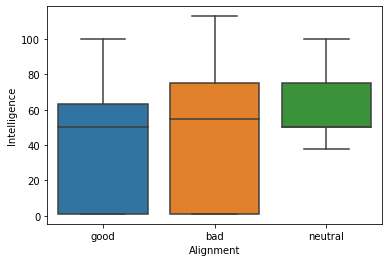

In [108]:
sns.boxplot(x = 'Alignment', y='Intelligence',data=stats_df)
plt.show()

- Intelligence가 가장 높은 영웅은 bad한 영웅이다.
- Neutral한 영웅들은 대부분 높은 Intelligence를 가지고 있다.

### Strength

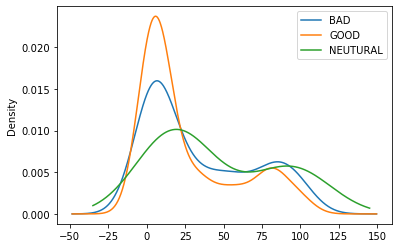

In [109]:
my_stats_df['Strength'][my_stats_df['Alignment'] == 'bad'].plot(kind='kde')
my_stats_df['Strength'][my_stats_df['Alignment'] == 'good'].plot(kind='kde')
my_stats_df['Strength'][my_stats_df['Alignment'] == 'neutral'].plot(kind='kde')
plt.legend(['BAD','GOOD','NEUTURAL'])
plt.show()

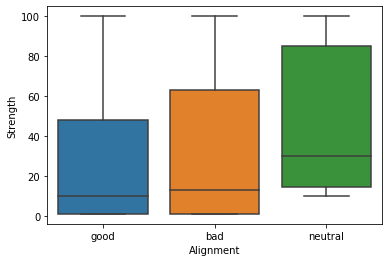

In [110]:
sns.boxplot(x = 'Alignment', y='Strength',data=stats_df)
plt.show()

- netrual한 영웅들의 Strength의 중간값이 가장 높다
- good한 영웅들은 낮은 strengh에 가장 많이 분포해 있다.

### Speed

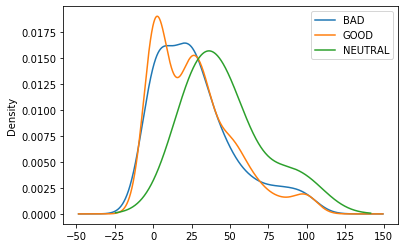

In [111]:
stats_df['Speed'][stats_df['Alignment'] == 'bad'].plot(kind='kde')
stats_df['Speed'][stats_df['Alignment'] == 'good'].plot(kind='kde')
stats_df['Speed'][stats_df['Alignment'] == 'neutral'].plot(kind='kde')
plt.legend(['BAD','GOOD','NEUTRAL'])
plt.show()

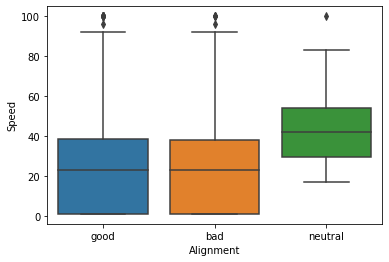

In [112]:
sns.boxplot(x = 'Alignment', y='Speed',data=stats_df)
plt.show()

- netural한 영웅들이 다른 영웅들보다 높은 Speed를 가진다.

### Durability

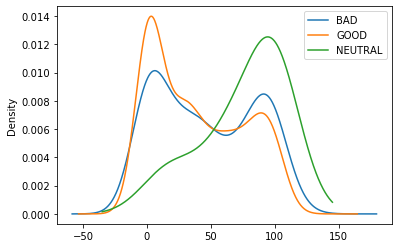

In [113]:
my_stats_df['Durability'][my_stats_df['Alignment'] == 'bad'].plot(kind='kde')
my_stats_df['Durability'][my_stats_df['Alignment'] == 'good'].plot(kind='kde')
my_stats_df['Durability'][my_stats_df['Alignment'] == 'neutral'].plot(kind='kde')
plt.legend(['BAD','GOOD','NEUTRAL'])
plt.show()

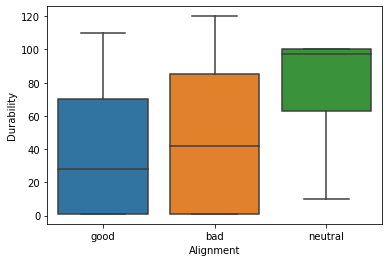

In [114]:
sns.boxplot(x = 'Alignment', y='Durability',data=my_stats_df)
plt.show()

- netural한 영웅들이 다른 영웅들보다 높은 Durability에 분포한다

### Power

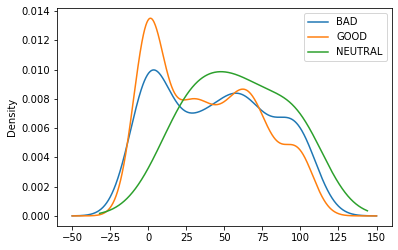

In [115]:
my_stats_df['Power'][my_stats_df['Alignment'] == 'bad'].plot(kind='kde')
my_stats_df['Power'][my_stats_df['Alignment'] == 'good'].plot(kind='kde')
my_stats_df['Power'][my_stats_df['Alignment'] == 'neutral'].plot(kind='kde')
plt.legend(['BAD','GOOD','NEUTRAL'])
plt.show()

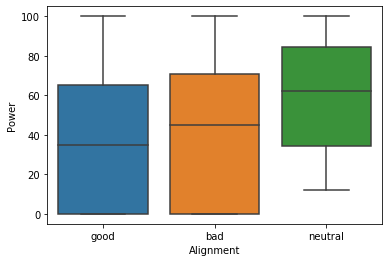

In [116]:
sns.boxplot(x = 'Alignment', y='Power',data=my_stats_df)
plt.show()

netural한 영웅들이 다른 영웅들보다 높은 Power에 분포한다.

### Comabat

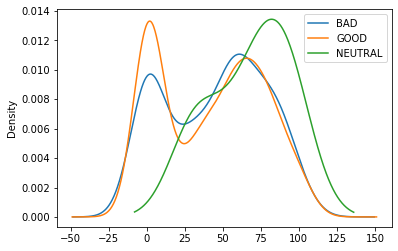

In [117]:
my_stats_df['Combat'][my_stats_df['Alignment'] == 'bad'].plot(kind='kde')
my_stats_df['Combat'][my_stats_df['Alignment'] == 'good'].plot(kind='kde')
my_stats_df['Combat'][my_stats_df['Alignment'] == 'neutral'].plot(kind='kde')
plt.legend(['BAD','GOOD','NEUTRAL'])
plt.show()

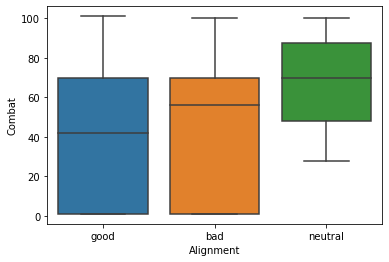

In [118]:
sns.boxplot(x = 'Alignment', y='Combat',data=my_stats_df)
plt.show()

- nuetral한 영웅들이 높은 Combat에 분포한다.

## Strength vs Durability

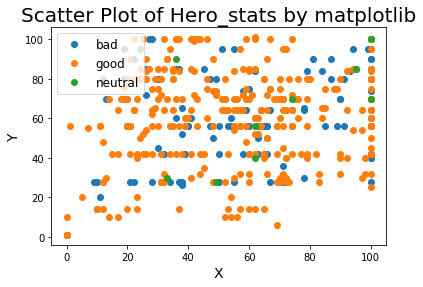

In [139]:
"""
Alignment       
Intelligence    
Strength        
Speed           
Durability      
Power           
Combat          
"""
groups = my_stats_df.groupby('Alignment')
 

fig, ax = plt.subplots()

for name, group in groups:

    ax.plot(group.Power, 

            group.Combat, 

            marker='o', 

            linestyle='',

            label=name)

ax.legend(fontsize=12, loc='upper left') # legend position

plt.title('Scatter Plot of Hero_stats by matplotlib', fontsize=20)

plt.xlabel('X', fontsize=14)

plt.ylabel('Y', fontsize=14)

plt.show()

#큰 의미 없어보임

In [122]:
# Scatter plot by Groups

sns.scatterplot(x='Strength', y='Durability',data=my_stats_df) #hue='Alignment', 

plt.show()

## 왜 오류가 나는지 모르겟어



TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type